In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives

- create descriptive features for defenders that will be used in clustering models

In [2]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 106 entries, fb_id to pAdj_Tackle_int_blocks
dtypes: float64(98), object(8)
memory usage: 584.0+ KB


In [3]:
df.columns.values

array(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Player', 'Nation', 'Position',
       'Tackle_pct_won', 'Nineties', 'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp', 'Total_Att', 'Total_Cmp_pct', 'Total_Tot_Dist',
       'Total_Prg_Dist', 'Short_Cmp', 'Short_Att', 'Short_Cmp_pct',
       'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct', 'Long_Cmp',
       'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog',
       'carries_att_3rd', 'carries_att_box', 'miss_control', 'dispossed',
       'recep_targ', 'recep_succ', 'recept_pct', 'Fouls_drawn',
       'Offsides', 'Crosses', 'PK_won', 'Aerial_win_pct', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist'

In [40]:
# consolidate short and medium passing percentage
df['avg_short+long_pass_pct'] = (df['Short_Cmp_pct']+df['Medium_Cmp_pct'])/2

## get ratio of long balls for players to have a feel about who passes at distance the most 
df['ratio_long_balls']=df['Long_Att']/df['Total_Att']

## who effecivly moves the ball up the field on the dribble or through the air 
df['prog_carry+lng_comp+crosses'] = df['carries_prog']+df['Long_Cmp']+df['Crosses']

# put all of the attack minded touch features into one 
df['attacking_touches']= df['touches_att_3rd']+df['touches_att_box']+ df['num_dribble_past'] +df['carries_att_3rd']+df['carries_att_box']


df.loc[(df['Position']=='DF')][['avg_short+long_pass_pct','ratio_long_balls','prog_carry+lng_comp+crosses','attacking_touches']].describe()

,avg_short+long_pass_pct,ratio_long_balls,prog_carry+lng_comp+crosses,attacking_touches
count,227.000000,227.000000,227.000000,227.000000
mean,88.849559,0.200758,10.324587,12.870451
std,4.687214,0.069469,3.302164,9.953301
min,66.300000,0.048649,1.000000,0.000000
25%,85.975000,0.145345,8.133214,3.910742
50%,89.200000,0.196958,10.598291,9.190283
75%,92.500000,0.250833,12.593765,21.456015
max,100.000000,0.438547,22.636364,38.461538


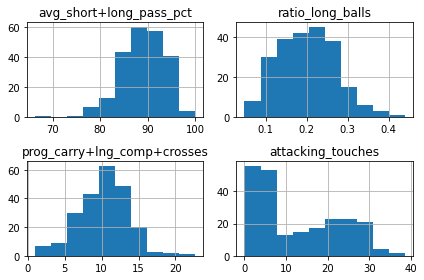

In [42]:
df.loc[(df['Position']=='DF')][['avg_short+long_pass_pct','ratio_long_balls','prog_carry+lng_comp+crosses','attacking_touches']].hist()
plt.tight_layout()
plt.show()

In [46]:
df.loc[(df['ratio_long_balls']>.32)&(df['Position']=='DF')][['player_name','Nineties', 'Squad_from_op','ratio_long_balls',
                                                             'prog_carry+lng_comp+crosses','attacking_touches']].sort_values(by='ratio_long_balls',ascending=False)

,player_name,Nineties,Squad_from_op,ratio_long_balls,prog_carry+lng_comp+crosses,attacking_touches
69,Tom Edwards,21.7,NY Red Bulls,0.438547,14.377880,13.870968
385,Jack Elliott,33.0,Philadelphia,0.383309,13.090909,5.515152
256,Carlos Terán,10.8,Chicago Fire,0.371377,13.518519,10.000000
422,Danny Wilson,27.2,Colorado Rapids,0.363108,15.147059,2.720588
447,Amro Tarek,9.6,NY Red Bulls,0.356234,11.250000,5.104167
624,Stuart Findlay,4.2,Philadelphia,0.350000,9.761905,6.666667
258,Jakob Glesnes,34.0,Philadelphia,0.349650,13.235294,5.735294
542,Andy Rose,18.3,Vancouver,0.322699,11.311475,2.131148
345,Erik Holt,15.1,Real Salt Lake,0.322404,11.854305,4.370861
291,Leandro González Pirez,29.5,Inter Miami,0.322074,12.949153,5.762712


In [37]:
df['prog_carry+lng_comp+crosses'] = df['carries_prog']+df['Long_Cmp']+df['Crosses']
df.loc[(df['Position']=='DF')]['prog_carry+lng_comp+crosses'].describe()

count    227.000000
mean      10.324587
std        3.302164
min        1.000000
25%        8.133214
50%       10.598291
75%       12.593765
max       22.636364
Name: prog_carry+lng_comp+crosses, dtype: float64

In [27]:
df.loc[(df['prog_carry+lng_comp+crosses']>17)&(df['Position']=='DF')][['player_name','Nineties', 'Squad_from_op','prog_carry+lng_comp+crosses',
                                                 'ratio_long_balls','recept_pct']].sort_values(by='prog_carry+lng_comp+crosses',ascending=False)

,player_name,Nineties,Squad_from_op,prog_carry+lng_comp+crosses,ratio_long_balls,recept_pct
316,Andreu Fontàs,33.0,Sporting KC,22.636364,0.235146,98.9
59,Graham Zusi,23.6,Sporting KC,20.296610,0.237089,95.7
21,Kai Wagner,31.5,Philadelphia,18.507937,0.267984,94.1
1,Julian Gressel,29.9,D.C. United,17.959866,0.306005,83.9
527,Marcus Godinho,1.3,Vancouver,17.692308,0.134146,90.3
34,Aaron Herrera,27.9,Real Salt Lake,16.379928,0.219787,92.1
415,Oswaldo Alanís,22.7,San Jose,15.859031,0.290248,98.5
43,Romain Métanire,28.4,Minnesota Utd,15.352113,0.194759,93.2
344,Mustafa Kizza,7.3,CF Montréal,15.342466,0.230769,88.0
49,Guðmundur Þórarinsson,18.3,NYCFC,15.300546,0.187320,90.5


### max values not outliers but best players at the features

In [47]:
# put all of the attack minded touch features into one 

df['attacking_touches']= df['touches_att_3rd']+df['touches_att_box']+ df['num_dribble_past'] +df['carries_att_3rd']+df['carries_att_box']
df.loc[(df['Position']=='DF')]['attacking_touches'].describe()

count    227.000000
mean      12.870451
std        9.953301
min        0.000000
25%        3.910742
50%        9.190283
75%       21.456015
max       38.461538
Name: attacking_touches, dtype: float64

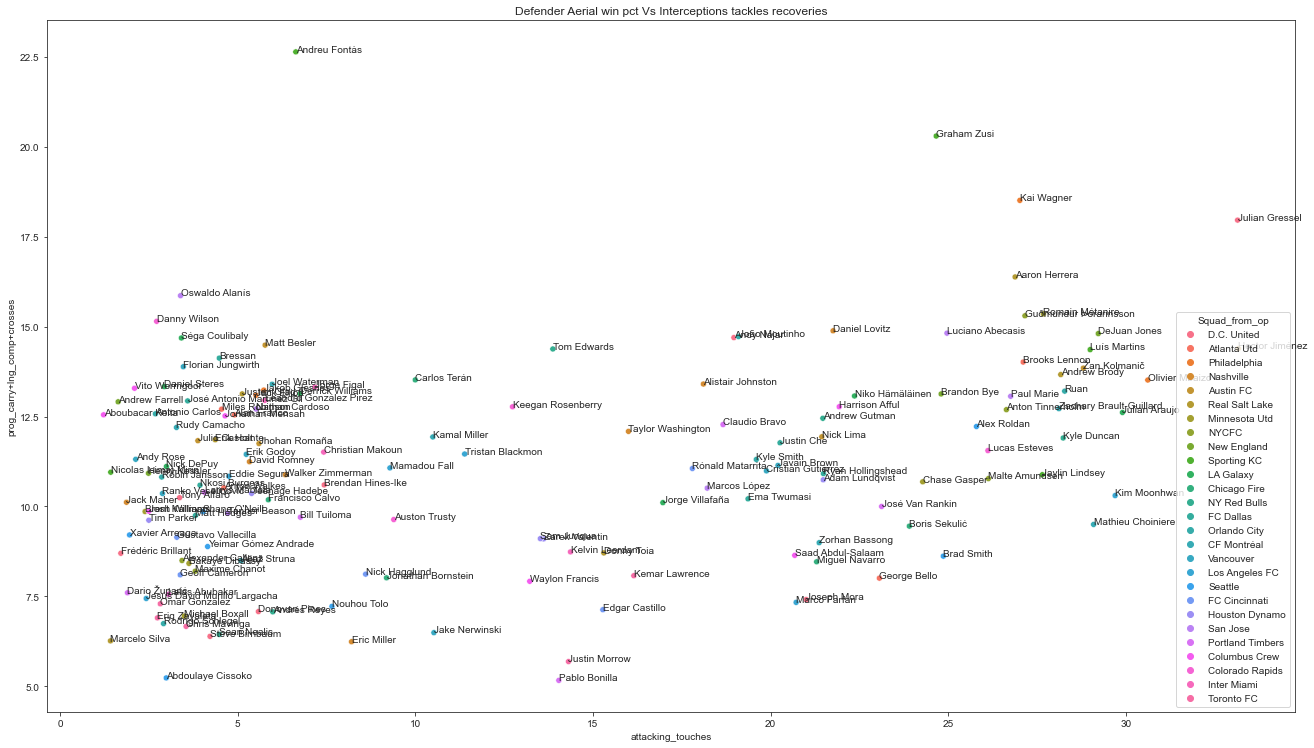

In [57]:
graph = df.loc[(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]


sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)

x = graph['attacking_touches']
y = graph['prog_carry+lng_comp+crosses']
p = graph['player_name']

g = sns.scatterplot(data=graph, x ='attacking_touches', y='prog_carry+lng_comp+crosses' ,hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Interceptions tackles recoveries')


for p, x, y in zip(p, x, y):
    plt.annotate(p, (x, y))

plt.tight_layout()

In [51]:
df.to_csv('../data/final_features.csv',index=False)

In [11]:
save new features to feature selected df to use later on

'features to feature selected df to use later on' was not found in history, as a file, url, nor in the user namespace.
